In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
from scipy.optimize import fsolve

In [2]:
N = 6.4
q = 0.16
beta = 4
alpha = 0.019

lambda_h = 0.3
phi = 2.18*0.9
h = 0.6
gamma_1 = 0.6
mu = 0.3
lambda_0 = N*q


beta_cc = (lambda_0 + phi) * (1 - h)
beta_ch = (lambda_0 + phi) * h
beta_hc = lambda_h * (1 - h)
beta_hh = lambda_h * h + lambda_0 * beta * alpha
gamma = 1 #gamma_1 + mu

R_cc = beta_cc/gamma
R_ch = beta_ch/gamma
R_hc = beta_hc/gamma
R_hh = beta_hh/gamma

def equations(vars):
    q_10, q_01 = vars
    eq1 = R_cc/(R_cc+R_ch+1)*q_10**2 + R_ch/(R_cc+R_ch+1)*q_10*q_01 + 1/(R_cc+R_ch+1) - q_10
    eq2 = R_hh/(R_hc+R_hh+1)*q_01**2 + R_hc/(R_hc+R_hh+1)*q_10*q_01 + 1/(R_hc+R_hh+1) - q_01
    return [eq1, eq2]

initial_guess = [0.5, 0.5]

solution = fsolve(equations, initial_guess)

print(f"1 - q_10 = {1 - solution[0]}, 1 - q_01 = {1 - solution[1]}")
print(solution)

1 - q_10 = 0.3176927168834811, 1 - q_01 = 0.048092838006643546
[0.68230728 0.95190716]


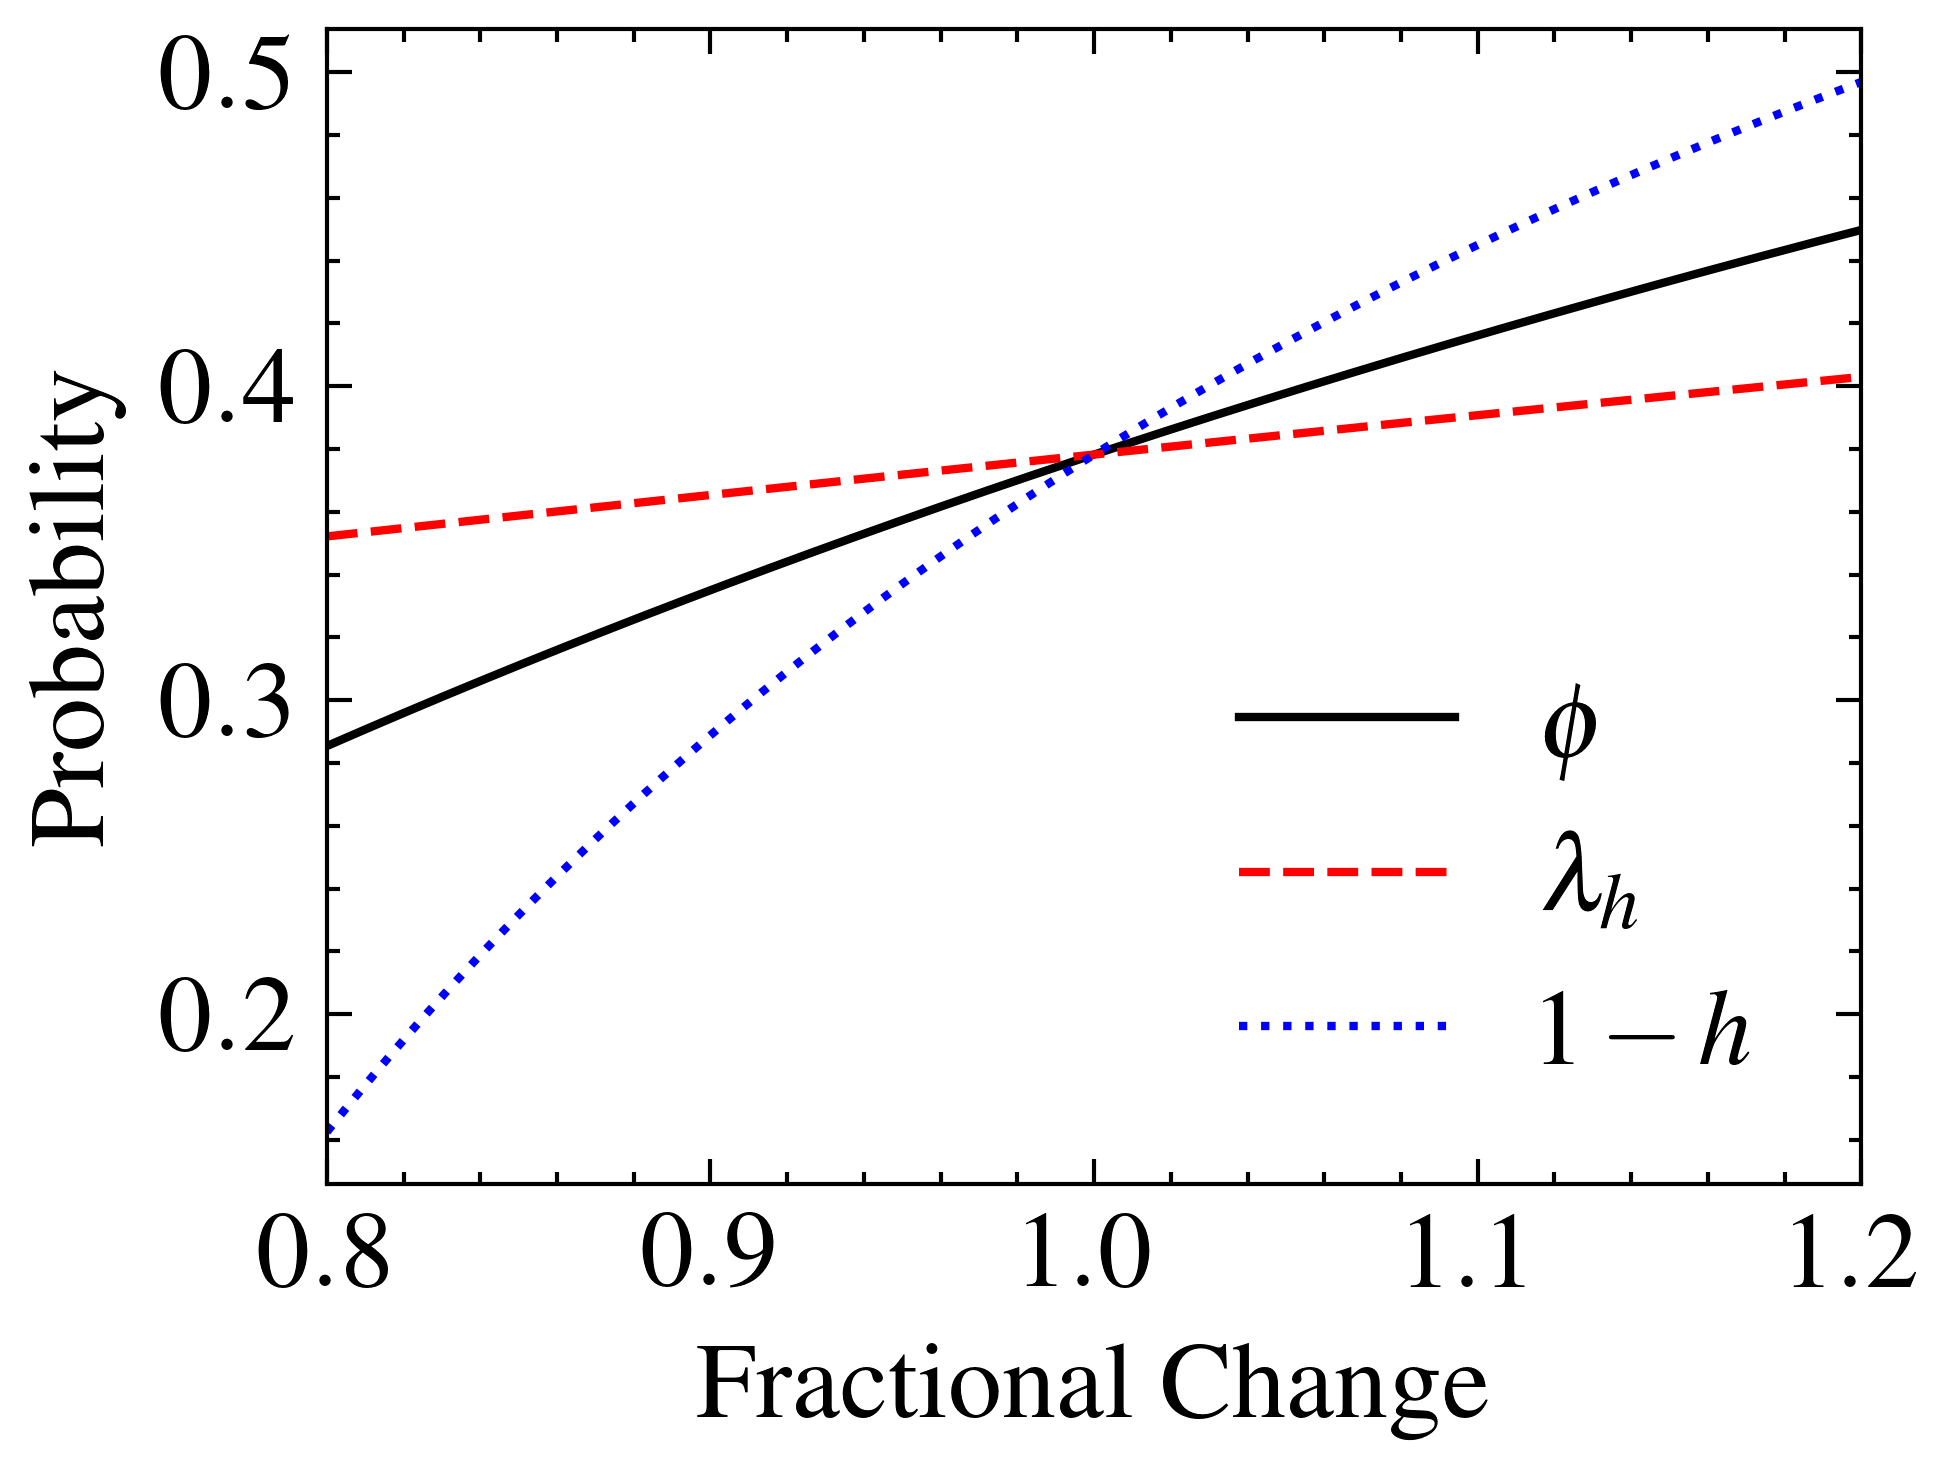

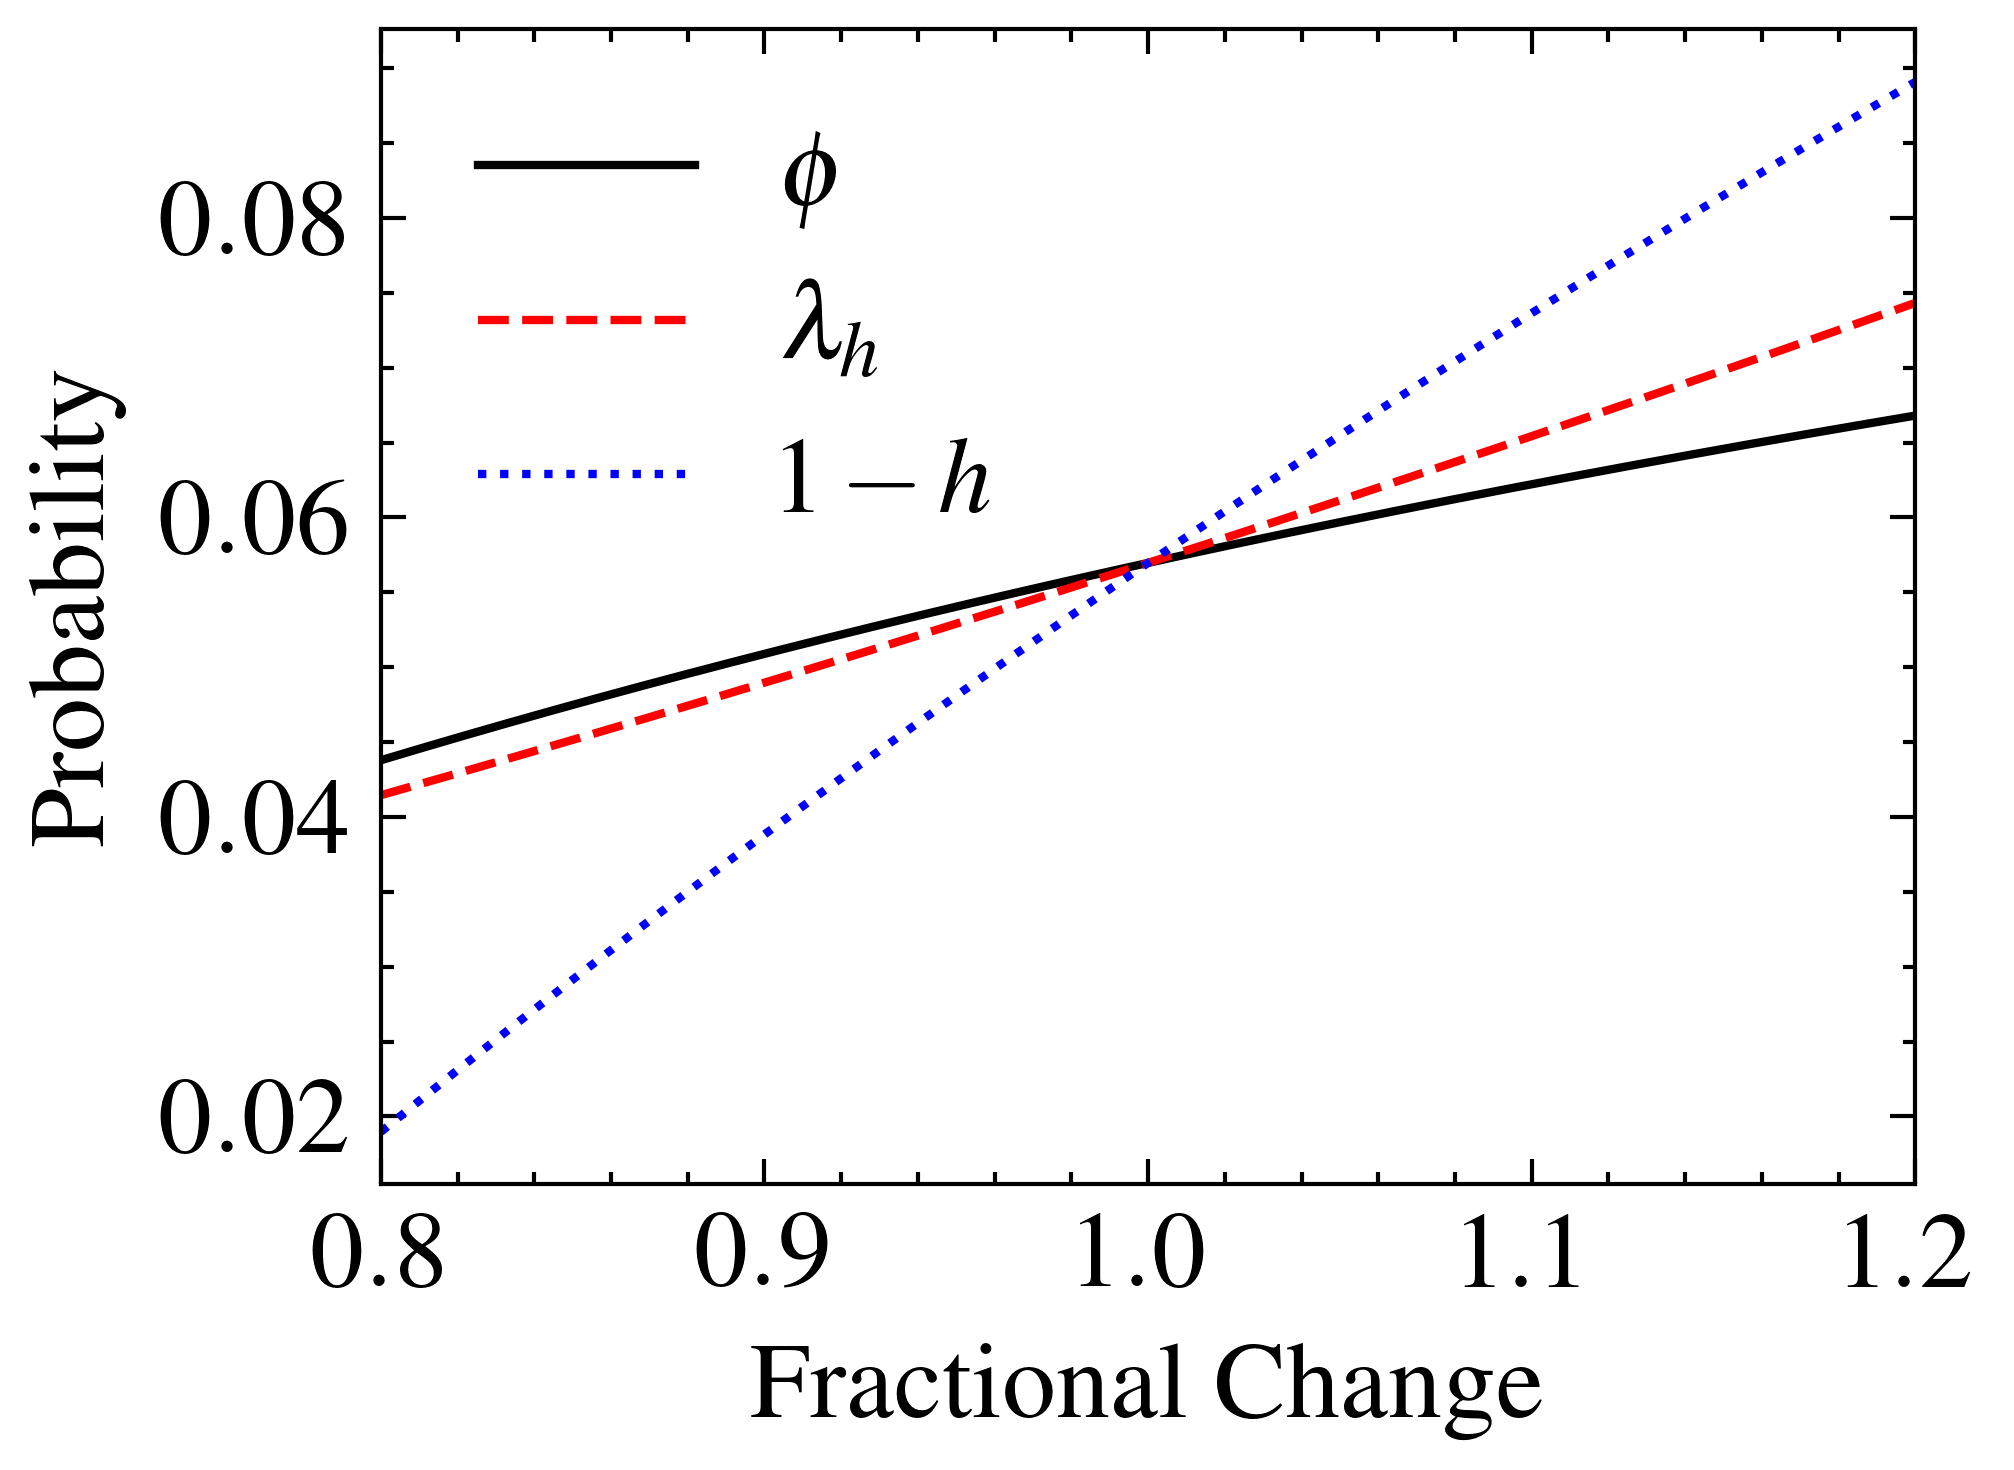

In [3]:
# Sensitivity Analysis - path 2 and path 3 stop in figure
# Path 2 Removal ~  Safe Burials ~ g = 1 ~ phi = 0
# Path 3 Decrease/Removal ~ Hopsital Restrictions ~ lambda_h reduction / = 0


def plots_phi(phi_arr):

    N = 6.4
    q = 0.16
    beta = 4
    alpha = 0.019

    lambda_h = 0.3
    phi = phi_arr
    h = 0.6
    gamma_1 = 0.6
    mu = 0.3
    lambda_0 = 1.1
    
    community = []
    hospital = []
    
    for i in range(len(phi_arr)):

        beta_cc = (lambda_0 + phi[i]) * (1 - h)
        beta_ch = (lambda_0 + phi[i]) * h
        beta_hc = lambda_h * (1 - h)
        beta_hh = lambda_h * h + lambda_0 * beta * alpha
        gamma = 1 #gamma_1 + mu


        R_cc = beta_cc/gamma
        R_ch = beta_ch/gamma
        R_hc = beta_hc/gamma
        R_hh = beta_hh/gamma

    
        def equations(vars):
            q_10, q_01 = vars
            eq1 = R_cc/(R_cc+R_ch+1)*q_10**2 + R_ch/(R_cc+R_ch+1)*q_10*q_01 + 1/(R_cc+R_ch+1) - q_10
            eq2 = R_hh/(R_hc+R_hh+1)*q_01**2 + R_hc/(R_hc+R_hh+1)*q_10*q_01 + 1/(R_hc+R_hh+1) - q_01
            return [eq1, eq2]

        initial_guess = [0.5, 0.5]

        solution = fsolve(equations, initial_guess)

        #print(f"1 - q_10 = {1 - solution[0]}, 1 - q_01 = {1 - solution[1]}")
        community.append(1 - solution[0])
        hospital.append(1 - solution[1])
        
    return phi, community, hospital
    
    
    

def plots_lambda_h(lambda_h_arr):

    N = 6.4
    q = 0.16
    beta = 4
    alpha = 0.019

    lambda_h = lambda_h_arr
    phi = 2.18
    h = 0.6
    gamma_1 = 0.6
    mu = 0.3
    lambda_0 = 1.1
    community = []
    hospital = []
    for i in range(len(lambda_h_arr)):

        beta_cc = (lambda_0 + phi) * (1 - h)
        beta_ch = (lambda_0 + phi) * h
        beta_hc = lambda_h[i] * (1 - h)
        beta_hh = lambda_h[i] * h + lambda_0 * beta * alpha
        gamma = 1 #gamma_1 + mu


        R_cc = beta_cc/gamma
        R_ch = beta_ch/gamma
        R_hc = beta_hc/gamma
        R_hh = beta_hh/gamma

    
        def equations(vars):
            q_10, q_01 = vars
            eq1 = R_cc/(R_cc+R_ch+1)*q_10**2 + R_ch/(R_cc+R_ch+1)*q_10*q_01 + 1/(R_cc+R_ch+1) - q_10
            eq2 = R_hh/(R_hc+R_hh+1)*q_01**2 + R_hc/(R_hc+R_hh+1)*q_10*q_01 + 1/(R_hc+R_hh+1) - q_01
            return [eq1, eq2]

        initial_guess = [0.5, 0.5]

        solution = fsolve(equations, initial_guess)

        #print(f"1 - q_10 = {1 - solution[0]}, 1 - q_01 = {1 - solution[1]}")
        community.append(1 - solution[0])
        hospital.append(1 - solution[1])
        
    return lambda_h, community, hospital

def plots_h(h_arr):

    N = 6.4
    q = 0.16
    beta = 4
    alpha = 0.019

    lambda_h = 0.3
    phi = 2.18
    h = h_arr
    gamma_1 = 0.6
    mu = 0.3
    lambda_0 = 1.1
    community = []
    hospital = []
    for i in range(len(h_arr)):

        beta_cc = (lambda_0 + phi) * (1 - h[i])
        beta_ch = (lambda_0 + phi) * h[i]
        beta_hc = lambda_h * (1 - h[i])
        beta_hh = lambda_h * h[i] + lambda_0 * beta * alpha
        gamma = 1 #gamma_1 + mu


        R_cc = beta_cc/gamma
        R_ch = beta_ch/gamma
        R_hc = beta_hc/gamma
        R_hh = beta_hh/gamma

    
        def equations(vars):
            q_10, q_01 = vars
            eq1 = R_cc/(R_cc+R_ch+1)*q_10**2 + R_ch/(R_cc+R_ch+1)*q_10*q_01 + 1/(R_cc+R_ch+1) - q_10
            eq2 = R_hh/(R_hc+R_hh+1)*q_01**2 + R_hc/(R_hc+R_hh+1)*q_10*q_01 + 1/(R_hc+R_hh+1) - q_01
            return [eq1, eq2]

        initial_guess = [0.5, 0.5]

        solution = fsolve(equations, initial_guess)

        #print(f"1 - q_10 = {1 - solution[0]}, 1 - q_01 = {1 - solution[1]}")
        community.append(1 - solution[0])
        hospital.append(1 - solution[1])
        
    return h, community, hospital

phi_arr = 2.18*np.linspace(0.8,1.2,1001)
lambda_h_arr = 0.3*np.linspace(0.8,1.2,1001)
h_arr = 0.6*np.linspace(0.8,1.2,1001)
h_Arr = 0.6*np.linspace(1.2,0.8,1001)

phi = phi_arr
lambda_h = lambda_h_arr
h = h_Arr

_, comm_phi, hosp_phi = plots_phi(phi_arr)
_, comm_lambda_h, hosp_lambda_h = plots_lambda_h(lambda_h_arr)
_, comm_h, hosp_h = plots_h(h_Arr)

phi[phi < 0] = 0
lambda_h[lambda_h < 0] = 0
h[h < 0] = 0


import scienceplots

plt.style.use(['science','ieee'])
plt.rcParams['font.size'] = 13

fig, ax = plt.subplots()
ax.plot(phi_arr / 2.18, comm_phi, label='$\phi$')
ax.plot(lambda_h_arr / 0.3, comm_lambda_h, label='$\lambda_h$')
ax.plot(h_arr / 0.6, comm_h, label='$1-h$')
ax.set_ylabel('Probability')
ax.set_xlabel('Fractional Change')
ax.set_xlim([0.8, 1.2])
ax.legend()
fig.savefig("/home/jakeb/development/Branching-Process-Models/notebooks/figures/sentivity_com.pdf")

fig, ax = plt.subplots()
ax.plot(phi_arr / 2.18, hosp_phi, label='$\phi$')
ax.plot(lambda_h_arr / 0.3, hosp_lambda_h, label='$\lambda_h$')
ax.plot(h_arr / 0.6, hosp_h, label='$1-h$')
ax.set_ylabel('Probability')
ax.set_xlabel('Fractional Change')
ax.set_xlim([0.8, 1.2])
ax.legend()
fig.savefig("/home/jakeb/development/Branching-Process-Models/notebooks/figures/sentivity_hosp.pdf")

In [5]:
np.linspace(.3,0,4)

array([0.3, 0.2, 0.1, 0. ])